# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [62]:
import pandas as pd
import requests
import tweepy
import json


In [63]:
# Loading in the data from a file given
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [64]:
import requests

# Assigning the image URL to a variable called "url"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Send a Get request to the URL
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
# Reading the file into a datafram and separating by delimiter
twitter_images = pd.read_csv('image_predictions.tsv', sep='\t')

# Displaying the first few row of information
twitter_images.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [65]:
# Twitter API Credentials
consumer_key = 'REMOVED'
consumer_secret = 'REMOVED'
access_token = 'REMOVED'
access_token_secrete = 'REMOVED'

In [66]:
# Tweepy API Authentication using the previous credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secrete)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [67]:
# List to hold tweet JSON data
# tweet_data = []
# for tweet_id in twitter_archive['tweet_id']:
#    try:
 #       tweet = api.get_status(tweet_id, tweet_mode='exended')
  #      tweet_data.append(tweet._jason)
   # except tweepy.errors.TweepyException as e:
    #    print(f"Error for tweet id {tweet_id}: {e}")
    
# Since twitter no longer offers a free service for querying their data, I had to download the file for the project and load it into a data frame.
tweet_json = []
with open('./tweet_json.txt', 'r') as file:
    for line in file:
        tweet_json.append(json.loads(line))


In [68]:
# Taking the json file and move it into a data frame so we can work with it in the cleaning process. 
twitter_tweets = pd.DataFrame(tweet_json)
twitter_tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [69]:
# Visually assessing the data
print("Visual Assessment of twitter_archive")
twitter_archive.head(1)

Visual Assessment of twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [70]:
# Visual Assessment of just the predictions
print("\nVisual Assessment of image_predictions")
twitter_images.head(1)


Visual Assessment of image_predictions


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [71]:
# Visual Assessment of just the tweets dataframe
print("\nVisual Assessment of tweets_df")
twitter_tweets.head(1)


Visual Assessment of tweets_df


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [72]:
# Programmatically assessing twitter archive
print("\nProgrammatic Assessment of twitter_archive\n")
print("\n", twitter_archive.info())
print("\nDescribe:\n", twitter_archive.describe())
print("\nNull Values:\n", twitter_archive.isnull().sum())


Programmatic Assessment of twitter_archive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   o

In [73]:
# Programmatically assessing image predictions
print("\nProgrammatic Assessement of twitter_images\n")
print("\n", twitter_images.info())
print("\nDescribe:\n",twitter_images.describe())
print("\nNull Values:\n",twitter_images.isnull().sum())


Programmatic Assessement of twitter_images

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB

 None

Describe:
            tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6

In [74]:
# Programmatically assessing twitter_tweets
print("\nProgrammatic Assessment of twitter_tweets\n")
print("\n",twitter_tweets.info())
print("\nDescribe:\n",twitter_tweets.describe())
print("\nNull Values:\n",twitter_tweets.isnull().sum())


Programmatic Assessment of twitter_tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_r

### Quality issues
1. twitter_archive: Some tweets are retweets and should be removed.
2. twitter_archive: timestamp should be a datetime object, not a string.
3. twitter_archive: expanded_urls has missing values.
4. twitter_archive: Some names in the name column are invalid (e.g., 'a', 'an', 'the').
5. twitter_archive: rating_numerator and rating_denominator extracted from text need validation and cleaning.
6. image_predictions: Missing values in some columns.
7. tweets_df: Columns other than retweet_count and favorite_count can be dropped as they are not necessary for the analysis.
8. twitter_archive: Missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

### Tidiness issues
1. twitter_archive: Rename id to tweet_id

2. twitter_archive: Melt and Merge Dog stages columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [110]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
twitter_images_clean = twitter_images.copy()
twitter_tweets_clean = twitter_tweets.copy()

### Issue #1: Remove retweets

#### Define: 
Remove rows in twitter_archive_clean where retweeted_status_id is not null

#### Code:

In [111]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test:

In [112]:
twitter_archive_clean['retweeted_status_id'].notnull().sum()

0

### Issue #2: Convert timestamp to datetime

#### Define:
Convert the timestamp column to datetime

#### Code:

In [113]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test:

In [114]:
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #3: Handling Missing values in expanded_urls

#### Define:
Drop rows where expanded_urls is null.

#### Code:

In [115]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test:

In [116]:
twitter_archive_clean['expanded_urls'].isnull().sum()

0

### Issue #4: Clean invalid name values

#### Define:
Replace invalid names with None. (ex. "a", "an", "the")

#### Code:

In [117]:
invalid_names = ['a', 'an', 'the', 'this', 'such', 'quite', 'one', 'not', 'incredibly', 'very', 'his', 'her']
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(lambda x: x if x not in invalid_names else None)

#### Test:

In [118]:
twitter_archive_clean['name'].isin(invalid_names).sum()

0

### Issue #5: Extract and clean rating_numerator and rating_denominator

#### Define:
Extract rating_numerator and rating_denominator from text and convert to approriate data types

#### Code:

In [119]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.?\d*)/(?=\d+)', expand=False).astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['text'].str.extract('/(\d+)', expand=False).astype('float')

#### Test:

In [120]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']].head()

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0


### Issue #6: Handle missing values in image_pred

#### Define:
Remove rows with missing values in image_predictions_clean

#### Code:

In [121]:
twitter_images_clean = twitter_images_clean.dropna()

#### Test:

In [122]:
twitter_images_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Issue #7: Drop unnceessary columns in tweets_df

#### Define: Keep only id, retweet_count, and favorite_count columns

#### Code

In [123]:
twitter_tweets_clean = twitter_tweets_clean[['id', 'retweet_count', 'favorite_count']]

#### Test

In [124]:
twitter_tweets_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #8: Remove tweets without images

#### Define
Keep only tweets with images in twitter_archive_clean by checking for non-null values in jpg_url column in image_predictions_clean.


#### Code

In [125]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(twitter_images_clean['tweet_id'])]

#### Test

In [126]:
twitter_archive_clean.shape

(1994, 17)

### Tidiness Issue #1: Rename id to tweet _id in tweets_df

#### Define: Rename the id column in tweets_df to tweet_id.


#### Code

In [127]:
twitter_tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [128]:
twitter_tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Tidiness Issue #2: Melt and Merg dog stage columns

#### Define
Merg Dog stages into one column


#### Code

In [129]:
# Checking the what the columns structure looks like
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   float64            
 

In [131]:
twitter_archive_merge = twitter_archive_clean.copy()

In [132]:
# Masking and changing Values in the 'Floofer' Column
mask = (twitter_archive_merge['doggo'] == 'None') & (twitter_archive_merge['floofer'] == 'None') & (twitter_archive_merge['pupper'] == 'None') & (twitter_archive_merge['puppo'] == 'None')
twitter_archive_merge.loc[mask, 'floofer'] = 'floofer'

In [133]:
# test 
twitter_archive_merge.floofer.value_counts()

floofer
floofer    8
Name: count, dtype: int64

In [134]:
# Preparing Columns for Melting
id_vars = twitter_archive_merge.columns.values.tolist()
[id_vars.remove(i) for i in ['doggo', 'floofer','pupper','puppo']]

[None, None, None, None]

In [135]:
# Melting DataFrame
twitter_archive_merge = twitter_archive_merge.melt(id_vars=id_vars, value_vars=['doggo', 'floofer','pupper','puppo'], value_name='dog_stages', ignore_index=True)

In [139]:
#Removing Rows with 'None' in the 'dog_stages' column
twitter_archive_merge =twitter_archive_merge[twitter_archive_merge['dog_stages'] != 'None']

In [142]:
# Checking dog stages column values
twitter_archive_merge.dog_stages.value_counts()

dog_stages
pupper     212
doggo       74
puppo       23
floofer      8
Name: count, dtype: int64

In [143]:
# overwriting original twitter_archive_clean Dataframe with cleaned dataframe
twitter_archive_clean = twitter_archive_merge

#### Test

In [144]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7976 non-null   int64              
 1   in_reply_to_status_id       92 non-null     float64            
 2   in_reply_to_user_id         92 non-null     float64            
 3   timestamp                   7976 non-null   datetime64[ns, UTC]
 4   source                      7976 non-null   object             
 5   text                        7976 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               7976 non-null   object             
 10  rating_numerator            7976 non-null   float64         

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [147]:
# Merging the datasets into one file so we can save into a master file
master_df = pd.merge(twitter_archive_clean, twitter_images_clean, on='tweet_id', how='left')
master_df = pd.merge(master_df, twitter_tweets_clean, on='tweet_id', how='left')

In [150]:
# Testing output
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


In [149]:
output_file = './twitter_archive_master.csv'
master_df.to_csv(output_file, index=False)
print(f"Cleaned data has been saved to {output_file}")

Cleaned data has been saved to ./twitter_archive_master.csv


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Distribution of Ratings
2. Most Common Dog Breeds
3. Relationship Between Retweets and Likes

### Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data

c:\Users\sdell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The mean rating numerator is  12.24 and the median rating numerator is  11.00.


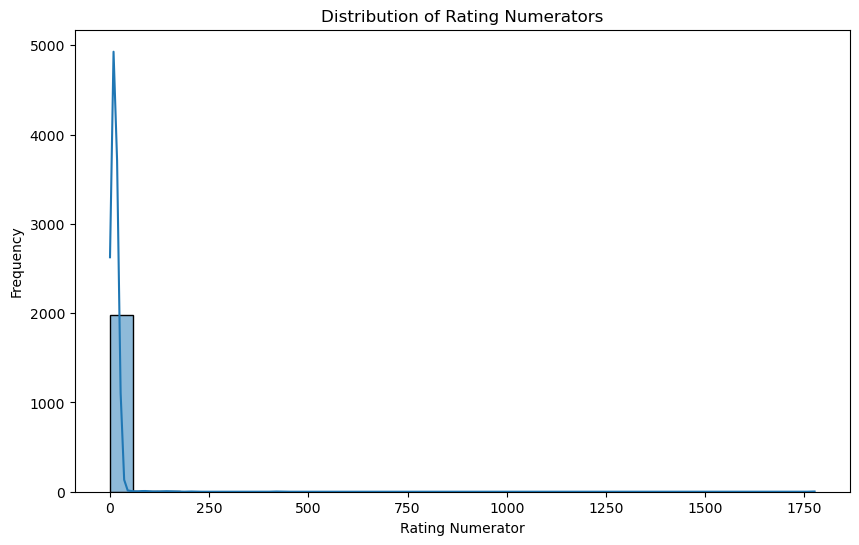

In [ ]:
# Distribution of rating
plt.figure(figsize=(10,6))
sns.histplot(master_df['rating_numerator'], bins=30, kde=True)
plt.title('Distribution of Rating Numerators')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')

# Insight 1:  Disbibution of ratings
rating_mean = master_df['rating_numerator'].mean()
rating_median = master_df['rating_numerator'].median()
print(f"The mean rating numerator is {rating_mean: .2f} and the median rating numerator is {rating_median: .2f}.")

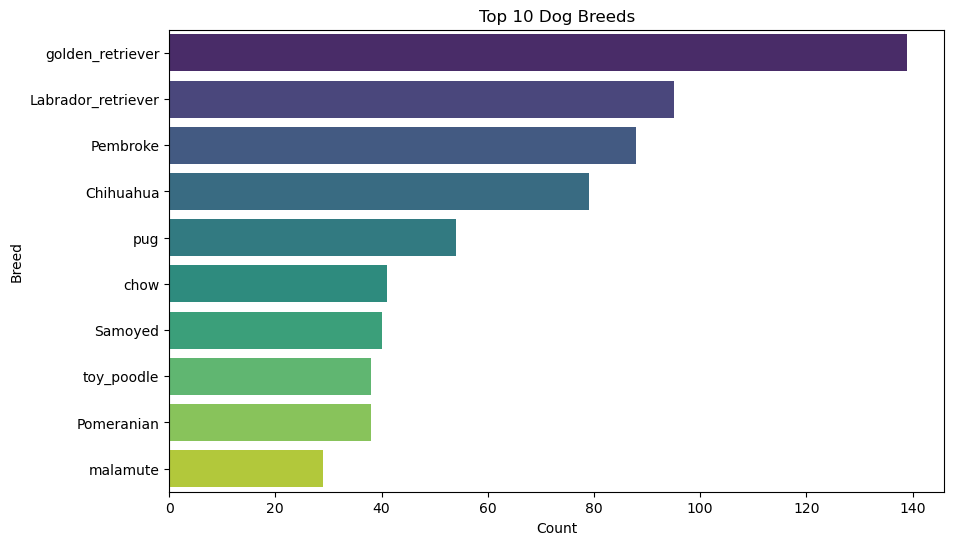

In [ ]:
# Insight 2: Most common breeds
top_breeds = master_df['p1'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_breeds.values, y=top_breeds.index, palette='viridis')
plt.title('Top 10 Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()

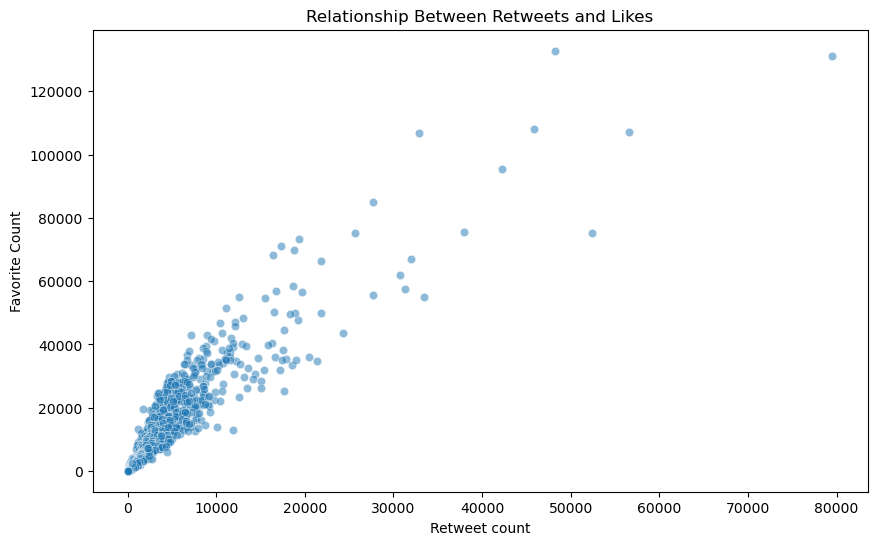

In [ ]:
# Insight 3: Relationship Between Retweets and Likes
plt.figure(figsize=(10,6))
sns.scatterplot(x='retweet_count', y='favorite_count', data=master_df, alpha=0.5)
plt.title('Relationship Between Retweets and Likes')
plt.xlabel('Retweet count')
plt.ylabel('Favorite Count')
plt.show()